# Final CookBook by Lucas Zheng

Source : Homework Project ;
Pandas library

https://pandas.pydata.org/docs/index.html

In [1]:
#import all the mods that I will use

#basic package
import pandas as pd
import numpy as np

#For Timestamp task
from datetime import datetime 

#Graphing 
import matplotlib.pyplot as plt
import seaborn as sb

#For API 
import requests
import json

# recipes 1 sorting the timestamp and find the average and max.

#For this recipe I will use my youtube timestamp, and the recipe will be how to sort into a standard datetime format and find the average Timestamp difference 

In [2]:
#get the dataset
df_lucas = pd.read_csv("zheng_timestamp.csv") 
df_lucas

,Timestamp
0,2022-04-10 07:48:09+00:00
1,2022-03-09 08:15:05+00:00
2,2021-12-12 09:18:19+00:00
3,2021-12-12 01:12:31+00:00
4,2021-12-07 15:57:44+00:00
...,...
116,2018-07-08 19:01:04+00:00
117,2018-05-28 05:24:54+00:00
118,2018-05-19 16:24:57+00:00
119,2018-05-02 05:50:18+00:00


First I need to convert the current Timestamp to a standard datetime format which I imported using datetime. Althouth in this case youtube data seems already in that format. But it is helpful to make sure it is correct. So I did this again.  

souce for datetime function:
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
After I use the datetime function to Timestamp, it will show specific date and time in standard for futher use

In [3]:
# Convert the "Timestamp" column to datetime format
df_lucas['Timestamp'] = pd.to_datetime(df_lucas['Timestamp'])

# Sort the DataFrame by the "Timestamp" column, so make the date from the earlest to latest
#it can prevent the Time_Difference that I will created in next line have negative value
df_lucas = df_lucas.sort_values(by='Timestamp')


# Create a new column for the time difference between timestamps
#by one stamp - the stamp before him
df_lucas['Time_Difference'] = df_lucas['Timestamp'].diff()
df_lucas 

,Timestamp,Time_Difference
120,2018-03-26 19:34:34+00:00,NaT
119,2018-05-02 05:50:18+00:00,36 days 10:15:44
118,2018-05-19 16:24:57+00:00,17 days 10:34:39
117,2018-05-28 05:24:54+00:00,8 days 12:59:57
116,2018-07-08 19:01:04+00:00,41 days 13:36:10
...,...,...
4,2021-12-07 15:57:44+00:00,9 days 19:08:44
3,2021-12-12 01:12:31+00:00,4 days 09:14:47
2,2021-12-12 09:18:19+00:00,0 days 08:05:48
1,2022-03-09 08:15:05+00:00,86 days 22:56:46


From the code above, I made the Timestamp coloum into a standard timestamp format and created a new coloum called Time_Difference by using the function .diff()

In [4]:
#Use mean funtion to find the average time between timestamps
#This one is stright forward
average_time_difference = df_lucas['Time_Difference'].mean()
average_time_difference

Timedelta('12 days 07:06:06.791666666')

In [5]:
# I can also use to find the max Timestamp gap by using max function
# I can do the same task with min funtioni to find the minimum gap for these Timestamps
max_time_difference = df_lucas['Time_Difference'].max()
max_time_difference

Timedelta('209 days 09:36:09')

# Performing the same task with a different method by using .describe() function 

This is using the describe funtion to show all the statistic data for this dataset and then extract the ones I need from it manully. This is helpful to give a overview of the dataset.

In [6]:
# Calculate descriptive statistics for the "Time_Difference" column
time_difference = df_lucas['Time_Difference'].describe()
time_difference


count                           120
mean     12 days 07:06:06.791666666
std      29 days 11:44:34.252243477
min                 0 days 00:00:07
25%          0 days 14:32:32.250000
50%          2 days 06:19:10.500000
75%         10 days 03:07:46.250000
max               209 days 09:36:09
Name: Time_Difference, dtype: object

In [7]:
# Extract the mean and max values and print them out
# Assign the mean and max to variables and print them out 
average_time_diff = time_difference['mean']
max_time_diff = time_difference['max']

# Display the results
print("Average Time Difference:", average_time_diff)
print("Maximum Time Difference:", max_time_diff)


Average Time Difference: 12 days 07:06:06.791666666
Maximum Time Difference: 209 days 09:36:09


# Recipe 2 sorting and create coloum by dates month years, also with graphing chart

This Recipe is useful to originzing and futhor process the timestamp, with more specific infomations 

related to sort and group in days, month, year and select specific years. I create new column and group them with date, month and year

In [8]:
#create a new coloum using day function to find the exact date
#This step created a new colomn called Date

df_lucas['Date'] = pd.DatetimeIndex(df_lucas['Timestamp']).day

In [9]:
#create a new coloum using month function to find the exact month
#This step created a new colomn called month

df_lucas['Month'] = pd.DatetimeIndex(df_lucas['Timestamp']).month

In [10]:
#same with year
#This step created a new colomn called year

df_lucas['Year'] = pd.DatetimeIndex(df_lucas['Timestamp']).year

In [11]:
#Check what I got 
df_lucas

,Timestamp,Time_Difference,Date,Month,Year
120,2018-03-26 19:34:34+00:00,NaT,26,3,2018
119,2018-05-02 05:50:18+00:00,36 days 10:15:44,2,5,2018
118,2018-05-19 16:24:57+00:00,17 days 10:34:39,19,5,2018
117,2018-05-28 05:24:54+00:00,8 days 12:59:57,28,5,2018
116,2018-07-08 19:01:04+00:00,41 days 13:36:10,8,7,2018
...,...,...,...,...,...
4,2021-12-07 15:57:44+00:00,9 days 19:08:44,7,12,2021
3,2021-12-12 01:12:31+00:00,4 days 09:14:47,12,12,2021
2,2021-12-12 09:18:19+00:00,0 days 08:05:48,12,12,2021
1,2022-03-09 08:15:05+00:00,86 days 22:56:46,9,3,2022


# Here is another way to get the date month year by pandas function

In [12]:
 # Create a new column for the day of the month
#df_lucas['Date'] = df_lucas['Timestamp'].dt.day

# Create a new column for the month
#df_lucas['Month'] = df_lucas['Timestamp'].dt.month

# Create a new column for the year
#df_lucas['Year'] = df_lucas['Timestamp'].dt.year

# Recipe 3 Graph for selection year range, or month range


This recipe is useful to visulizing the dataframe by ploting historgam with the range of year I selected.

I use 'between' function for Year Column and also did the same task for month in the next following graph

The between function can use to select the range I assign from a specific column I want 

In [13]:
#filter the year range I want, I can apply same task to day or month 
df_filtered_years = df_lucas[df_lucas['Year'].between(2018, 2023)]

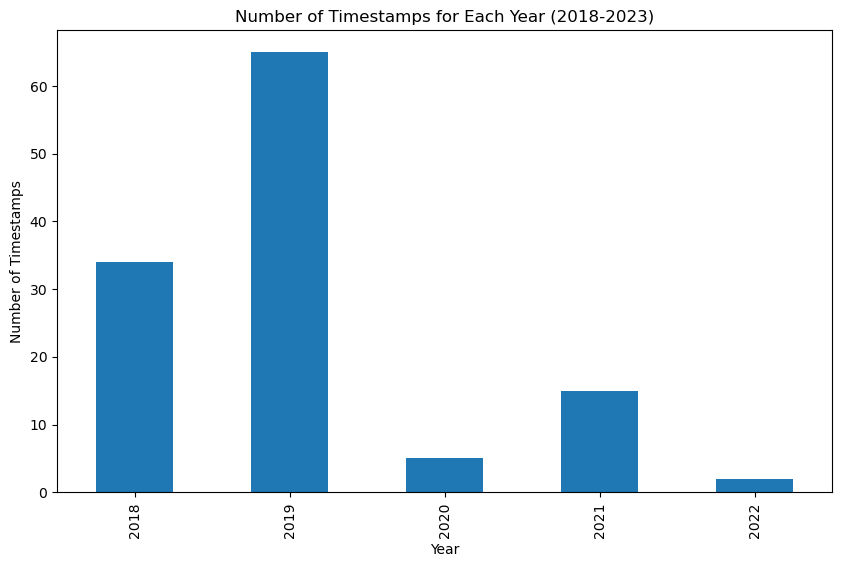

In [14]:
# Plot the number of timestamps for each year
df_filtered_years['Year'].value_counts().sort_index().plot(kind="bar", figsize=(10, 6))  #assign the X-axis infos
plt.title('Number of Timestamps for Each Year (2018-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Timestamps')
plt.show()

Same task apply to month, In this case I select from June to August

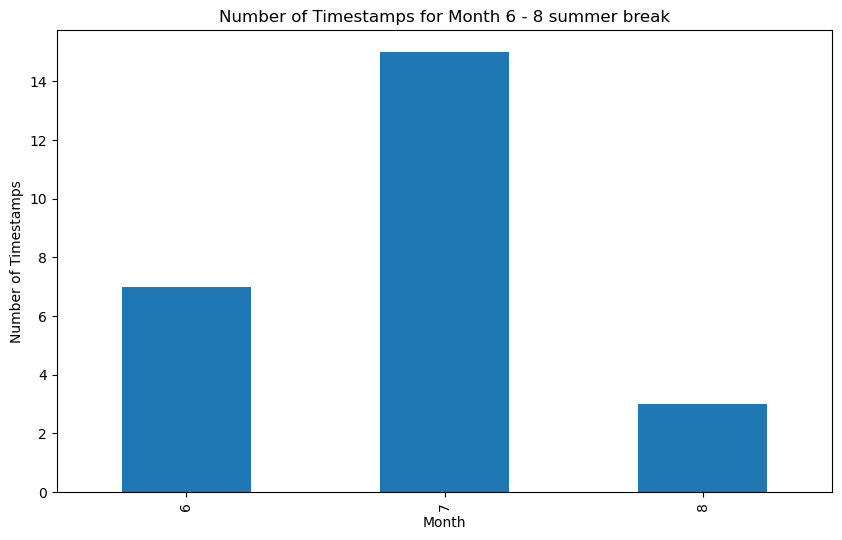

In [15]:
#Filter the month by range from 6 to 8
df_filtered_month= df_lucas[df_lucas['Month'].between(6, 8)]


#Do the same plotting method 
df_filtered_month['Month'].value_counts().sort_index().plot(kind="bar", figsize=(10, 6))
plt.title('Number of Timestamps for Month 6 - 8 summer break')
plt.xlabel('Month')
plt.ylabel('Number of Timestamps')
plt.show()

To do an extra task, I can find specific year with specific month, here is the example for year 2018 and month 3 - 7

This is for dive into deeper details if needed during the analyzing process

In [16]:
# Filter the DataFrame for the year 2018
df_2018 = df_lucas[df_lucas['Year'] == 2018]

# Filter the resulting DataFrame for months 3 to 7
df_3_7 = df_2018[df_2018['Month'].between(3, 7)]

df_3_7

,Timestamp,Time_Difference,Date,Month,Year
120,2018-03-26 19:34:34+00:00,NaT,26,3,2018
119,2018-05-02 05:50:18+00:00,36 days 10:15:44,2,5,2018
118,2018-05-19 16:24:57+00:00,17 days 10:34:39,19,5,2018
117,2018-05-28 05:24:54+00:00,8 days 12:59:57,28,5,2018
116,2018-07-08 19:01:04+00:00,41 days 13:36:10,8,7,2018
115,2018-07-09 05:05:56+00:00,0 days 10:04:52,9,7,2018
114,2018-07-09 05:55:09+00:00,0 days 00:49:13,9,7,2018
113,2018-07-15 21:06:46+00:00,6 days 15:11:37,15,7,2018


# Recipe 4 :Getting specific day or month range and plot it 
# ie. ploting the weekday graph

This Recipe is build on futher analysis for recipe 3 with more detail. Once I have sort the specific range or month. Now I can futher investigate specific days and plot the data from it. 

This step involves 

1.sorting the Timestamp into weekdays and weekend which I think is fun and helpful

2.Ploting the graph

Source for lambda function: https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/

In [17]:
# Idea :The weekdays starts from 0 and is Monday so Sunday will be 6 
# And I use dt.dayofweek which in the pandas module to 
# help me do the task
df_lucas['Weekday'] = df_lucas['Timestamp'].dt.dayofweek  # Monday is 0 and Sunday is 6

#then the weekend become weekdays that over or equal to 5, where 5 is Saturday and 6 is Sunday.
#I used lambda function here

df_lucas['Weekend'] = df_lucas['Weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Workday') #else are workday

#workdays will be from 0 to 4 , not really necessary since I already assign else are workday on the last line
#Just extrat step to show another perspective 

df_lucas['Workday'] = df_lucas['Weekday'].apply(lambda x: 'Workday' if x < 5 else 'Weekend')

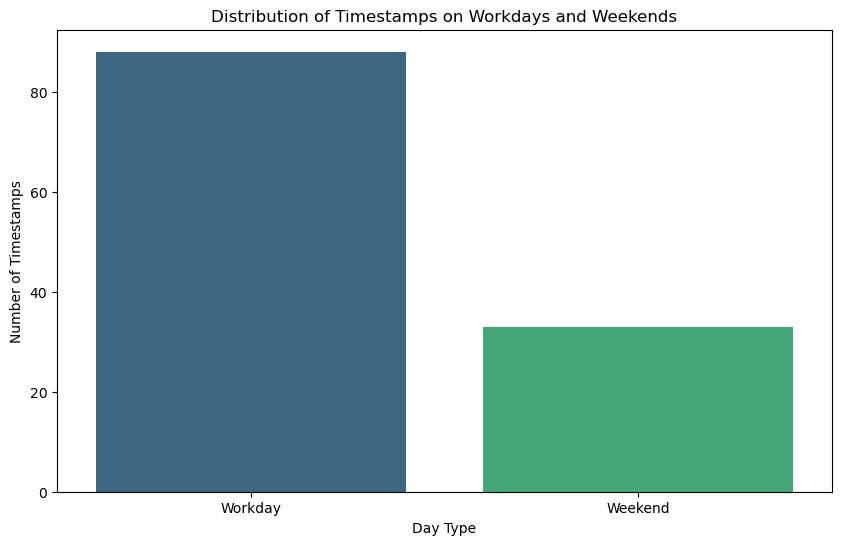

In [18]:
#use plot function to print the data in the dataset 
plt.figure(figsize=(10, 6))
sb.countplot(x='Workday', data=df_lucas, palette='viridis')

plt.title('Distribution of Timestamps on Workdays and Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Timestamps')
plt.show()


# Recipe 5 and 6  , getting information from API by request and sort them into a data frame This is very helpful if building a self library or dataset from the website my own

I used a previous requested API about pokemon (resource by Prof Wirfs-Brock)

# Recipe 5 : Get information from API 

Assign the base_url and use request function and the link after base_url to find the specific sessions from this API. Convert into json files the link after the base_url can find this the website of this api source

In [19]:
#A simple example that Looking for the pokemon_types
base_url = "https://pokeapi.co/api/v2/"

#add request link
pokemon_types = requests.get(base_url + "pokemon?limit=100000&offset=0").json()
pokemon_types


{'count': 1292,
 'next': None,
 'previous': None,
 'results': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
  {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
  {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
  {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
  {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
  {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
  {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
  {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
  {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
  {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
  {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
  {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
  {'name': 'weedle', 'url': 'https://pokeapi.co/api/v2/pokemon/13/'},
  {

# Recipe 6 put API infos into dataframe

# After get the pokemon_types, notice that each pokemon has a distinct url for futhor details, like abality, names...

In [20]:
# URL for the Pokémon API
pokemon_api_url = "https://pokeapi.co/api/v2/pokemon?limit=20"  #i set to 20,and it can be changed.
#A smaller number will be faster, I takes time to access from the API website

#store the url in a variable
response = requests.get(pokemon_api_url)
response

<Response [200]>

# Creating few list and append elements in there to construct a dataframe in next step

In [21]:
data = response.json()    #convert into json file
results = data["results"]

# lists to store Pokémon data
names = []
abilities = []
heights = []
weights = []

# loop through the list of Pokémon
for pokemon in results:
    pokemon_data = requests.get(pokemon["url"]).json()
    names.append(pokemon_data["name"])

    # get abilities from the results
    #these are specific categories from API information website 
    abilities_list = [ability["ability"]["name"] for ability in pokemon_data["abilities"]]
    abilities.append(", ".join(abilities_list))

    heights.append(pokemon_data["height"])
    weights.append(pokemon_data["weight"])



# Use the dataframe function and create a simple dataframe with the list I created 

In [22]:

# Create a DataFrame
#Set the row and colomn 

pokemon_df = pd.DataFrame({
    "Name": names,
    "Abilities": abilities,
    "Height": heights,
    "Weight": weights})

# Display the DataFrame
print(pokemon_df)

          Name                          Abilities  Height  Weight
0    bulbasaur              overgrow, chlorophyll       7      69
1      ivysaur              overgrow, chlorophyll      10     130
2     venusaur              overgrow, chlorophyll      20    1000
3   charmander                 blaze, solar-power       6      85
4   charmeleon                 blaze, solar-power      11     190
5    charizard                 blaze, solar-power      17     905
6     squirtle                 torrent, rain-dish       5      90
7    wartortle                 torrent, rain-dish      10     225
8    blastoise                 torrent, rain-dish      16     855
9     caterpie              shield-dust, run-away       3      29
10     metapod                          shed-skin       7      99
11  butterfree         compound-eyes, tinted-lens      11     320
12      weedle              shield-dust, run-away       3      32
13      kakuna                          shed-skin       6     100
14    beed

This is very helpful if I want to collect data my own from website. After this I can convert into a csv file and store it.